<a href="https://colab.research.google.com/github/Tinashemuza/Modeling/blob/main/Derivative_Pricing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Derivative Pricing**</center>



# Common Codes Used

### Import Libraries
**Below are the libraries we are going to use through out our the Project**

In [44]:
# Import Libraries
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


### Binomial Tree Code

In [45]:
# Function that computes the value of the underlying, the option, and the delta for Calibrated Binomial Model.

def option_sigma(S_ini, K, T, r, sigma, N, opttype = 'C', exertype = 'E'):
    dt=T/N #Define timestep
    u = np.exp(sigma * np.sqrt(dt)) # define u
    d = np.exp(-sigma * np.sqrt(dt)) # define d
    p=(np.exp(r*dt)-d)/(u-d) #risk neutral probs

    O = np.zeros([N + 1, N + 1]) # Option prices
    S = np.zeros([N + 1, N + 1]) # underlying price
    Delta = np.zeros([N + 1, N + 1]) # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            O[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        else:
            O[N, i] = max(K - (S_ini * (u ** (i)) * (d ** (N - i))), 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            O[j, i] = np.exp(-r * dt) * (p * O[j + 1, i + 1] + (1 - p) * O[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))

            if exertype == 'A': # Decision between the European option price and the payoff from early-exercise
                if opttype == "C":
                    O[j, i] = max(O[j, i], S[j, i] - K)
                else:
                    O[j, i] = max(O[j, i], K - S[j, i])

            Delta[j, i] = (O[j + 1, i + 1] - O[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

    return O[0, 0], O, S, Delta

### Binomial Tree Plot

In [46]:
# Code for Binomial Plot

# Plot Binomial Grid
def binomial_grid(n):

    G=nx.Graph()
    for i in range(0,n+1):
        for j in range(1,i+2):
            if i<n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j),(i+1,j+1))
    posG={}
    for node in G.nodes():
        posG[node]=(node[0],n+2+node[0]-2*node[1])

    nx.draw(G,pos=posG)

# Plot Price and Option Tree
def plot_binomial_tree(initial_spot, asset_array, option_array, delta_array, N):

    s = initial_spot
    px = asset_array
    opx = option_array
    delta = delta_array
    x_pos = [-0.07,1*0.9/N,2*0.9/N,3*0.9/N,4*0.9/N,5*0.9/N]

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(-0.07,0.50, 'S = '+str(round(s,2)))
    plt.figtext(-0.07,0.47, 'V = '+str(round(opx[0,0],2)))
    plt.figtext(-0.07,0.44, '$\Delta$ = '+str(round(delta[0,0],2)))

    if N > 0:
        # Step 1
        plt.figtext(x_pos[1],0.73, 'S = '+str(round(px[1,1],2)))
        plt.figtext(x_pos[1],0.70, 'V = '+str(round(opx[1,1],2)))
        plt.figtext(x_pos[1],0.67, '$\Delta$ = '+str(round(delta[1,1],2)))
        plt.figtext(x_pos[1],0.30, 'S = '+str(round(px[1,0],2)))
        plt.figtext(x_pos[1],0.27, 'V = '+str(round(opx[1,0],2)))
        plt.figtext(x_pos[1],0.24, '$\Delta$ = '+str(round(delta[1,0],2)))

    if N > 1:
    # Step 2
        plt.figtext(x_pos[2],0.84, 'S = '+str(round(px[2,2],2)))
        plt.figtext(x_pos[2],0.81, 'V = '+str(round(opx[2,2],2)))
        plt.figtext(x_pos[2],0.78, '$\Delta$ = '+str(round(delta[2,2],2)))
        plt.figtext(x_pos[2],0.63, 'S = '+str(round(px[2,1],2)))
        plt.figtext(x_pos[2],0.60, 'V = '+str(round(opx[2,1],2)))
        plt.figtext(x_pos[2],0.57, '$\Delta$ = '+str(round(delta[2,1],2)))
        plt.figtext(x_pos[2],0.20, 'S = '+str(round(px[2,0],2)))
        plt.figtext(x_pos[2],0.17, 'V = '+str(round(opx[2,0],2)))
        plt.figtext(x_pos[2],0.14, '$\Delta$ = '+str(round(delta[2,0],2)))

    if N > 2:
        # Step 3
        plt.figtext(x_pos[3],0.96, 'S = '+str(round(px[3,3],2)))
        plt.figtext(x_pos[3],0.93, 'V = '+str(round(opx[3,3],2)))
        plt.figtext(x_pos[3],0.90, '$\Delta$ = '+str(round(delta[3,3],2)))
        plt.figtext(x_pos[3],0.73, 'S = '+str(round(px[3,2],2)))
        plt.figtext(x_pos[3],0.70, 'V = '+str(round(opx[3,2],2)))
        plt.figtext(x_pos[3],0.67, '$\Delta$ = '+str(round(delta[3,2],2)))
        plt.figtext(x_pos[3],0.50, 'S = '+str(round(px[3,1],2)))
        plt.figtext(x_pos[3],0.47, 'V = '+str(round(opx[3,1],2)))
        plt.figtext(x_pos[3],0.43, '$\Delta$ = '+str(round(delta[3,1],2)))
        plt.figtext(x_pos[3],0.09, 'S = '+str(round(px[3,0],2)))
        plt.figtext(x_pos[3],0.06, 'V = '+str(round(opx[3,0],2)))
        plt.figtext(x_pos[3],0.03, '$\Delta$ = '+str(round(delta[3,0],2)))

    if N > 3:
    # Step 4
        plt.figtext(x_pos[4],1.05, 'S = '+str(round(px[4,4],2)))
        plt.figtext(x_pos[4],1.02, 'V = '+str(round(opx[4,4],2)))
        plt.figtext(x_pos[4],0.99, '$\Delta$ = '+str(round(delta[4,4],2)))
        plt.figtext(x_pos[4],0.83, 'S = '+str(round(px[4,3],2)))
        plt.figtext(x_pos[4],0.80, 'V = '+str(round(opx[4,3],2)))
        plt.figtext(x_pos[4],0.77, '$\Delta$ = '+str(round(delta[4,3],2)))
        plt.figtext(x_pos[4],0.60, 'S = '+str(round(px[4,2],2)))
        plt.figtext(x_pos[4],0.57, 'V = '+str(round(opx[4,2],2)))
        plt.figtext(x_pos[4],0.54, '$\Delta$ = '+str(round(delta[4,2],2)))
        plt.figtext(x_pos[4],0.39, 'S = '+str(round(px[4,1],2)))
        plt.figtext(x_pos[4],0.36, 'V = '+str(round(opx[4,1],2)))
        plt.figtext(x_pos[4],0.33, '$\Delta$ = '+str(round(delta[4,1],2)))
        plt.figtext(x_pos[4],-0.01, 'S = '+str(round(px[4,0],2)))
        plt.figtext(x_pos[4],-0.04, 'V = '+str(round(opx[4,0],2)))
        plt.figtext(x_pos[4],-0.07, '$\Delta$ = '+str(round(delta[4,0],2)))

    binomial_grid(N)


### Put-Call Parity Checker

In [47]:
# Put - Call Parity
# Structure= [ Stock Value at 0, Strike (K), Time (T), Free Interest rate (r), sigma, Number of steps (step), vertical
#              position in the step {bottom = 0, then 1,2,3, etc}, Exertype: American ('A') or European ('E') ]

def paritychecker(S_ini, K, T, r, sigma, N, step, p, exertype):
    S = option_sigma(S_ini, K, T, r, sigma, N,'C',exertype)[2][step,p]
    call = option_sigma(S_ini, K, T, r, sigma, N, 'C',exertype)[1][step,p]
    put = option_sigma(S_ini, K, T, r, sigma, N, 'P',exertype)[1][step,p]
    prev = K * np.exp(- r * (N-step)*(T/N))
    # Parity: call + pv = S_ini + put
    t1 = round(math.trunc(100 * (call + prev))/100,2) # math.trunc helps to clear the small difference that produce erros in round
    t2 = round(math.trunc(100 * (S + put))/100,2)
    print('t1 = ', t1)
    print('t2 = ', t2)
    print('Parity : ', t1==t2)

### Trinomial Model

In [48]:
# Trinomial Model Code

class TrinomialModel: # Defining our 'class': Trinomial Model
    # Initializing the Model
    def __init__(self, S0, r, sigma, mat, style='E'):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat
        self.style = style  # 'E' for European, 'A' for American

    def __compute_probs(self): # function) to compute the risk-neutral probabilities
        self.__pu = ((np.exp(self.__r * self.__h / 2) - np.exp(-self.__sigma * np.sqrt(self.__h / 2))) /
                     (np.exp(self.__sigma * np.sqrt(self.__h / 2)) - np.exp(-self.__sigma * np.sqrt(self.__h / 2)))) ** 2
        self.__pd = ((-np.exp(self.__r * self.__h / 2) + np.exp(self.__sigma * np.sqrt(self.__h / 2))) /
                     (np.exp(self.__sigma * np.sqrt(self.__h / 2)) - np.exp(-self.__sigma * np.sqrt(self.__h / 2)))) ** 2
        self.__pm = 1 - self.__pu - self.__pd

    # Method to check whether the given parameters are alright and that we have a 'recombining tree'
    def __check_up_value(self, up):
        if up is None:
            up = np.exp(self.__sigma * np.sqrt(2 * self.__h))
        self.__up = up
        self.__down = 1 / up

    # Method to compute underlying stock price path
    def __gen_stock_vec(self, nb):
        vec_u = self.__up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)
        vec_d = self.__down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)
        res = np.concatenate((vec_d[::-1], [1.0], vec_u))
        res *= self.__s0
        return res

    # Payoff method to be completed afterwards depending on the instrument we are pricing
    def payoff(self, stock_vec):
        raise NotImplementedError()

    # Compute current prices
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd + nxt_vec_prices[i + 1] * self.__pm + nxt_vec_prices[i + 2] * self.__pu
            expectation[i] = tmp
        return self.__discount * expectation

    # Option pricing
    def price(self, nb_steps, up=None):
        self.__h = self.__T / nb_steps
        self.__check_up_value(up)
        self.__compute_probs()
        self.__discount = np.exp(-self.__r * self.__h)

        final_vec_stock = self.__gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        for i in range(1, nb_steps + 1):
            vec_stock = self.__gen_stock_vec(nb_steps - i)
            current_price = self.compute_current_price(vec_stock, nxt_vec_prices)
            if self.style == 'A':
                # For American options we check the possibility of early exercise
                current_price = np.maximum(current_price, self.payoff(vec_stock))
            nxt_vec_prices = current_price

        return nxt_vec_prices[0]

class TrinomialCall(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K, style='E'):
        super(TrinomialCall, self).__init__(S0, r, sigma, mat, style)
        self.__K = K

    def payoff(self, s):
        return np.maximum(s - self.__K, 0.0)

class TrinomialPut(TrinomialModel):
    def __init__(self, S0, r, sigma, mat, K, style='E'):
        super(TrinomialPut, self).__init__(S0, r, sigma, mat, style)
        self.__K = K

    def payoff(self, s):
        return np.maximum(self.__K - s, 0.0)


In [49]:
# Put-Call price vs strike Table
from tabulate import tabulate

def moneyness_table(So, r, sigma, T, N, style):
    # Initialize the output data structure
    results = {'Strike Price': [], 'Call': [], 'Put': []}
    moneyness = [0.9, 0.95, 1, 1.05, 1.1]

    for m in moneyness:
        strike_price = m * So
        treeC = TrinomialCall(So, r, sigma, T, strike_price, style)
        Call = treeC.price(N)
        treeP = TrinomialPut(So, r, sigma, T, strike_price, style)
        Put = treeP.price(N)
        results['Strike Price'].append(strike_price)
        results['Call'].append(Call)
        results['Put'].append(Put)

    # Create DataFrame
    df = pd.DataFrame(results)
    return df

# Put-Call Parity Concept:

**Does put-call parity apply for European options?**


Yes, put-call parity applies to European options, because they can only be exercised at expiration. At maturity, the difference of the value of a call minus a put both having the same strike and expiration is always the difference of payoffs, which is always a unique value: the value of the stock at expiration minus the strike price. Therefore the price of the call and the put, at any time before expiration,  should exhibit a certain fair price correspondence that guarantees no arbitrage and that converges to the before mentioned value, as they approach expiration.


**Does put-call parity apply for American options?**

No, put-call parity does not apply to American options because they can be exercised before expiration. At maturity, European options and American options share the same value. However, before maturity the value of the call and the put are based on the expectation of what the value at maturity will be. If at a certain moment the value of the put obtained using expectations is lower than the result of exercising it and buying the underlying, then the parity is not valid and the put will be exercised.


At any time t with T = te - t, being tethe time of expiration, the Call Price is:

- C = P + S - K * $e^{-r T}$
- C = Call Price at t
- P = Put Price at t
- S = Stock Price at t
- K = Strike Price
- r  = Free interest rate
- T = time to expiration



#Pricing European calls and puts using a Binomial Tree:





Choosing the number of steps in the tree, we can choose a moderate number of steps. A common practice is to use a number of steps that is at least as large as the number of months until expiration (Cox, Ross, and Rubinstein, 1979$^1$).


Suppose in our case scenario, **S0 = 100; 𝑟 = 5%; σ = 20%; 𝑇 = 3 𝑚𝑜𝑛𝑡ℎ𝑠**. We want to price the European Call and Put Options.

Since 𝑇 = 3 months, we choose a **minimum of 3 steps**. However, to improve accuracy, we might decide to use a higher number of steps, such as 50 or 100. For our case, we choose 3 steps, which is a common choice for educational examples and provides a good trade-off between accuracy, allowing visualization of the tree, and computational complexity.

**European Call Option**

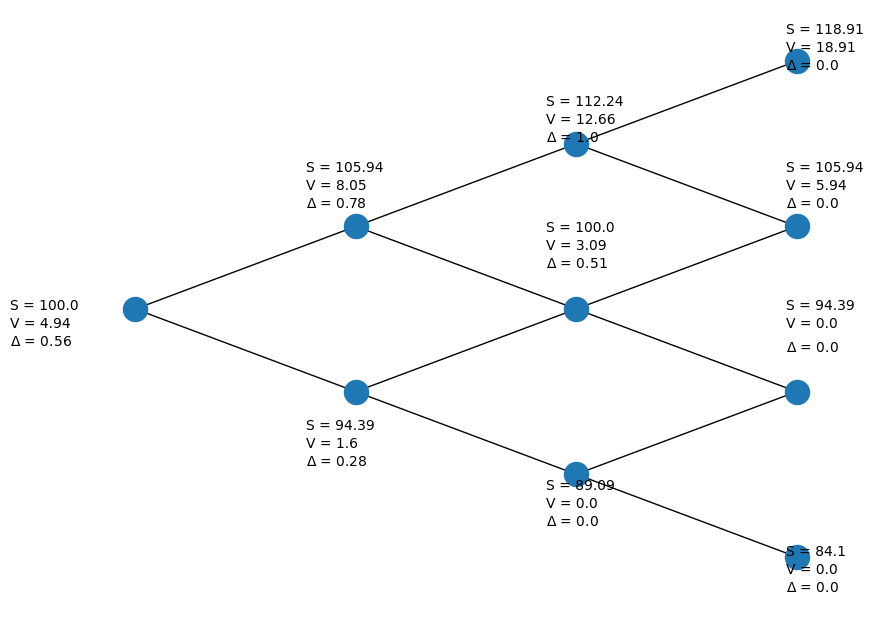

In [50]:
# Structure= [ Stock Value at 0, Strike (K), Time Unit (T), Free Interest rate (r), sigma,
#              Number of time units (N), Option Type: Call ('C') or Put ('P'), Exercise Type: "E" or "A" ]
N= 3
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.2, N,'C','E')
# price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.2, N,'P','A')
##### Plot Binomial Tree
plot_binomial_tree(S[0,0], S, option, delta, N)

**European Put Option**

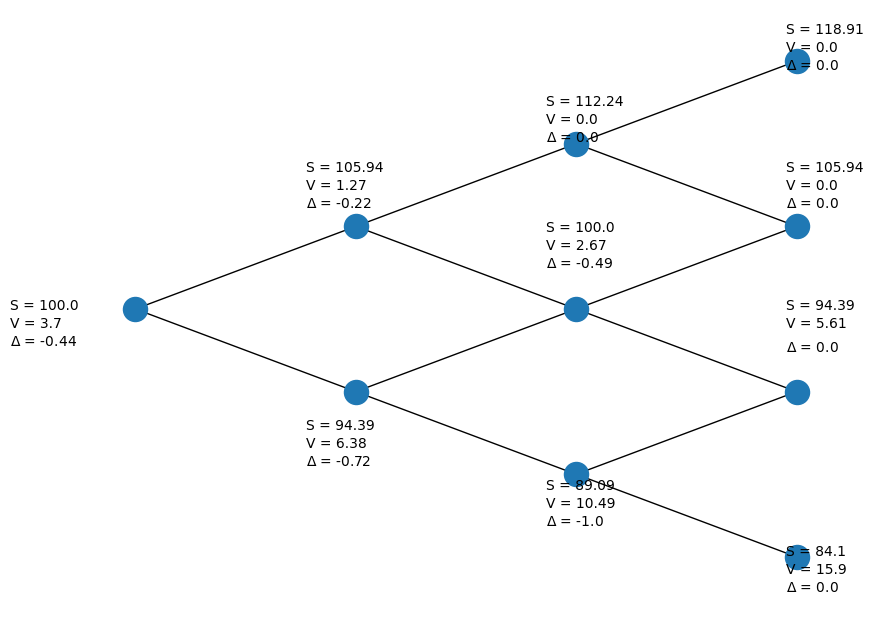

In [51]:
N= 3
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.2, N,'P','E')
# price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.2, N,'P','A')
##### Plot Binomial Tree
plot_binomial_tree(S[0,0], S, option, delta, N)

**Brief overview of the process:**

The binomial tree model is a discrete-time model for valuing options. The process for using a binomial tree to price options is as follows:


* Parameter Calculation: Calculate the up and down factors (𝑢 and 𝑑) and the risk-neutral probability (𝑝) using the given parameters (𝑆0, 𝑟, σ, 𝑇). The up and down factors represent the possible price movements in each step, and the risk-neutral probability represents the probability of the price moving up.

* Tree Construction: Construct the binomial tree with the specified number of steps. Each node in the tree represents a possible future price of the underlying asset. The tree starts with the initial stock price 𝑆0 and branches out with up and down movements until it reaches the final step.

* Option Valuation at Expiry: Calculate the value of the option at each final node (at expiry) using the option's payoff function. For a call, it's max(𝑆 - 𝐾, 0), and for a put, it's max(𝐾 - 𝑆, 0), where 𝐾 is the strike price and 𝑆 is the stock price at that node.

* Backward Induction: Work backward through the tree from the final step to the first, calculating the option value at each node by taking the expected value under the risk-neutral measure, discounted at the risk-free rate.

* Option Price: The price of the option is the value calculated at the initial node of the tree.



**Reason for choosing 3 steps:**

* The choice of 3 steps is a compromise between accuracy and computational effort. A higher number of steps would give us a more accurate estimate of the option price, as the binomial tree would more closely resemble the continuous price movements of the underlying asset. However, it would also require more computation.

* Three steps are often sufficient to achieve a reasonable estimate for educational and illustrative purposes without excessive computational cost.

However, in reality the optimal number of steps may depend on the specific requirements of the pricing task which will include the desired accuracy and available computational resources.

**Put - Call Parity Checker**
The call and put values are equal of $103.70, this suggests that the market is pricing the options in a way that is consistent with the put-call parity relationship. Thus, we have no arbitrage opportunities.

In [52]:
N = 3
paritychecker(100, 100, 1/4, 0.05, 0.2, N,0,0,'E')

t1 =  103.7
t2 =  103.7
Parity :  True


# Computation of the Greek Delta for the European call and European Put at Time 0:




The Greek Delta (Δ) measures the sensitivity of the option price to changes in the price of the underlying asset (Hull, 2018$^2$). It indicates the proportion of changes of the option price with respect to changes in the price of the underlying asset. For a call option, Delta is positive, meaning that the option price increases as the stock price goes up. For a put option, Delta is negative, meaning that the option price decreases as the stock price goes up.


**To compute the Delta for the European call and put options at time 0 using the binomial tree model, we can use the following approach:**

* Calculate the option price using the original stock price (S0).
*  Increase the stock price by a small amount (ΔS) and recalculate the option price.
* Compute the Delta as the change in the option price divided by the change in the stock price (ΔS).

**European Call Option**

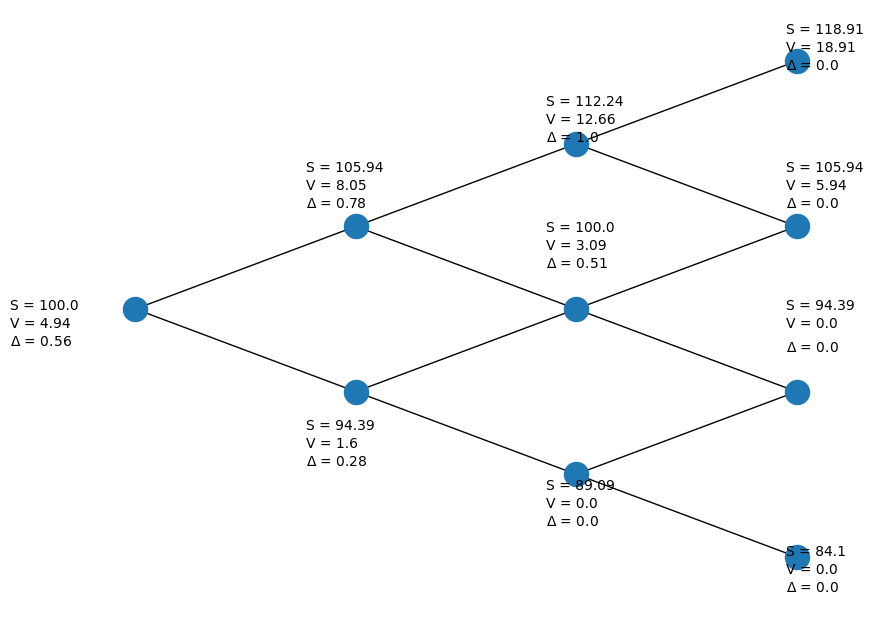

In [53]:
# Structure= [ Stock Value at 0, Strike (K), Time Unit (T), Free Interest rate (r), sigma,
#              Number of time units (N), Option Type: Call ('C') or Put ('P'), Exercise Type: "E" or "A" ]
N= 3
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.20, N,'C','E')
##### Plot Binomial Tree
plot_binomial_tree(S[0,0], S, option, delta, N)



* From the Binomial tree above, the delta for the **European Call option is 0.56**



**European Put Option**

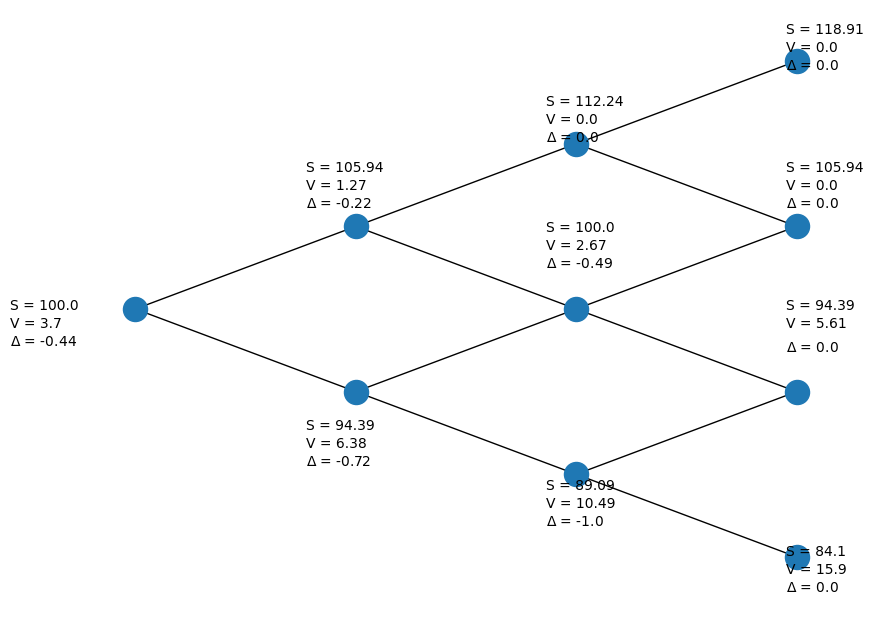

In [54]:
N= 3
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.20, N,'P','E')
##### Plot Binomial Tree
plot_binomial_tree(S[0,0], S, option, delta, N)


* From the Binomial tree above, the delta for the **European Put option is -0.44**


The Delta for the call option will be positive, while the Delta for the put option will be negative. This is because the call option benefits from an increase in the stock price, while the put option benefits from a decrease in the stock price.

**Differences and signs of Delta for both European Call and Put options:**

 * Delta for a call option is positive because as the stock price increases, the value of the call option also increases since the option becomes more likely to close-off in-the-money. Conversely, Delta for a put option is negative because as the stock price increases, the value of the put option decreases since the option becomes less likely to finish in-the-money.

* Delta can be thought of as an estimate of the probability of an option finishing in-the-money under the risk-neutral measure. It also represents the hedge ratio, which is the number of shares needed to hedge the option's price movement. A positive Delta for a call option means that one would need to own a proportion of the underlying stock to hedge against price increases. A negative Delta for a put option means that one would need to short a proportion of the underlying stock to hedge against price decreases.

* It makes sense to obtain a positive Delta for a call option and a negative Delta for a put option because of the directional risk associated with each option type. The call option has upside potential, and the put option has downside protection, reflecting their respective positions on the price movements of the underlying asset.



#Computing Vega

For us to calculate the sensitivity of the option prices to a change in volatility, known as Vega (ν), we can make use of a similar approach we used for Delta. Vega measures the rate of change of the option price with respect to changes in the volatility of the underlying asset. Unlike Delta, Vega is always positive for both call and put options because an increase in volatility increases the potential for movement in the stock price, which increases the value of the option.

**Below is our code to compute the sensitivity of the option prices to a 5% increase in volatility:**

**European Call Option -> Sensitivity to a 5% increase in volatility**

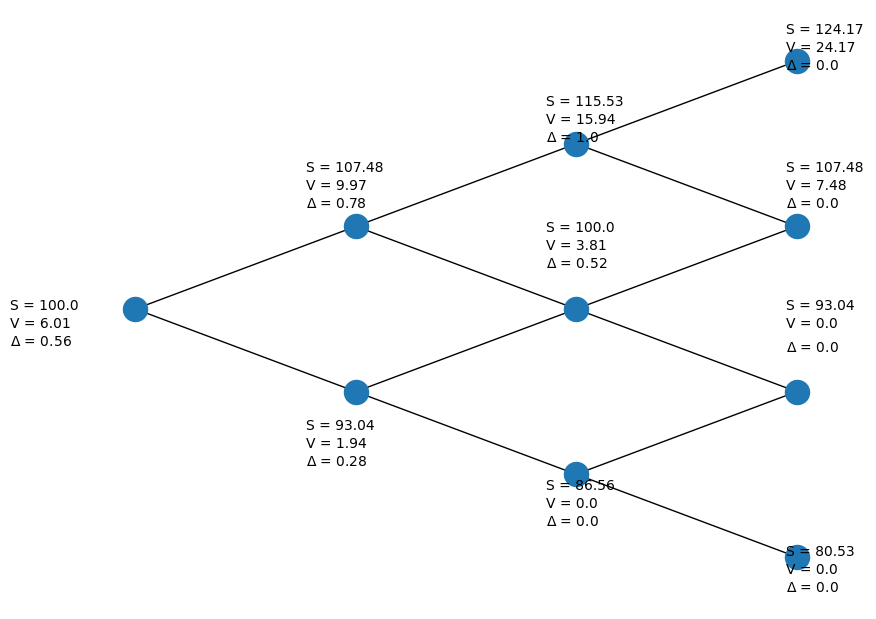

In [55]:
N= 3
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.25, N,'C','E')
##### Plot Binomial Tree
plot_binomial_tree(S[0,0], S, option, delta, N)

**European Put Option -> Sensitivity to a 5% increase in volatility**

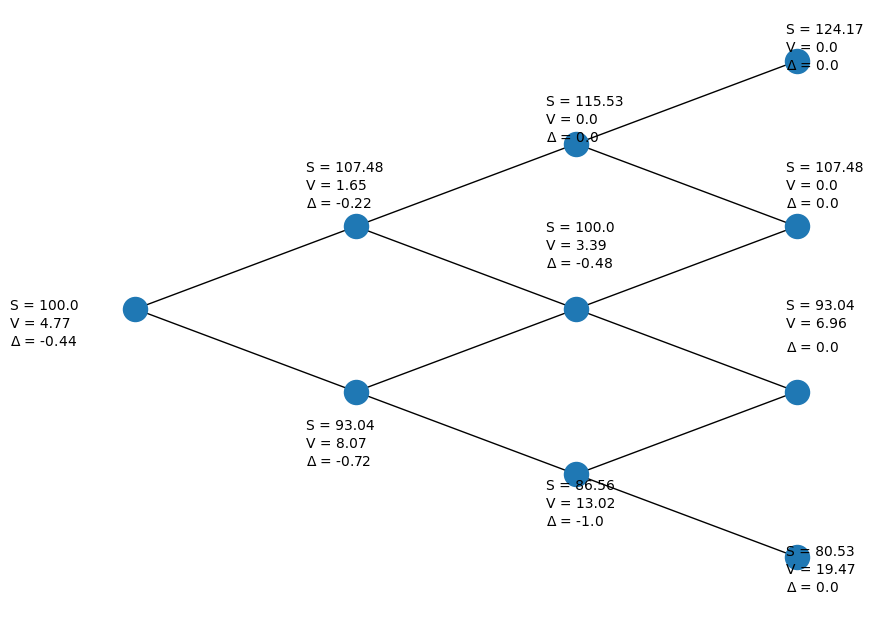

In [56]:
N= 3
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.25, N,'P','E')
##### Plot Binomial Tree
plot_binomial_tree(S[0,0], S, option, delta, N)

Both the call and put option prices will increase with an increase in volatility. This is because higher volatility implies a greater range of potential future prices for the underlying asset, which increases the chance that the option will end up in-the-money.



 Then the vega (v) in both cases are:

- Vega for the call = (6.01-4.94)/(0.25-0.2) = 21.4
- Vega for the put = (4.77-3.7)/(0.25-0.2) = 21.4

As can be seen, Vega is positive and the same for both call and put options. The impact of an increase in volatility is symmetrical for calls and puts. This property is a direct consequence of the put-call parity: both options should change in price in the same proportion as volatility changes, in order to preserve the put-call parity.


## **American Calls and Puts option using a Binomial Tree:**



#Suppose in our case scenario, **S0 = 100; 𝑟 = 5%; σ = 20%; 𝑇 = 3 𝑚𝑜𝑛𝑡ℎ𝑠**. We want to price the American style.

Since interest rates are expressed in year terms, we must express 3 months as 0.25 years, therefore T = 0.25.

Since T is three months, we decided to make a simulation of 3 steps, because it illustrates the dynamic of using the binomial model, without compromising much reliability (see question 5). Therefore, we set dt as 1 month, which in year terms is 1/12. Therefore N = T/dt = 3. Also, because we are calculating the prices at the ATM, this means that the strike price K = 100.

In [57]:
# Structure= [ Stock Value at 0, Strike (K), Time Unit (T), Free Interest rate (r), sigma,
#              Number of time units (N), Option Type: Call ('C') or Put ('P'), Exercise Type: "E" or "A" ]
N= 3
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.2, N,'P','A')
# price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.2, N,'P','A')

print("Underlying: \n", S)
print("Option Price: \n", option)  # [0][0]
print("Delta: \n", delta) # [4][0]

Underlying: 
 [[100.           0.           0.           0.        ]
 [ 94.39000224 105.9434237    0.           0.        ]
 [ 89.09472523 100.         112.24009024   0.        ]
 [ 84.09651314  94.39000224 105.9434237  118.91099436]]
Option Price: 
 [[ 3.79644372  0.          0.          0.        ]
 [ 6.58243631  1.2727012   0.          0.        ]
 [10.90527477  2.67204994  0.          0.        ]
 [15.90348686  5.60999776  0.          0.        ]]
Delta: 
 [[-0.45958118  0.          0.          0.        ]
 [-0.75497638 -0.21830312  0.          0.        ]
 [-1.         -0.48557025  0.          0.        ]
 [ 0.          0.          0.          0.        ]]


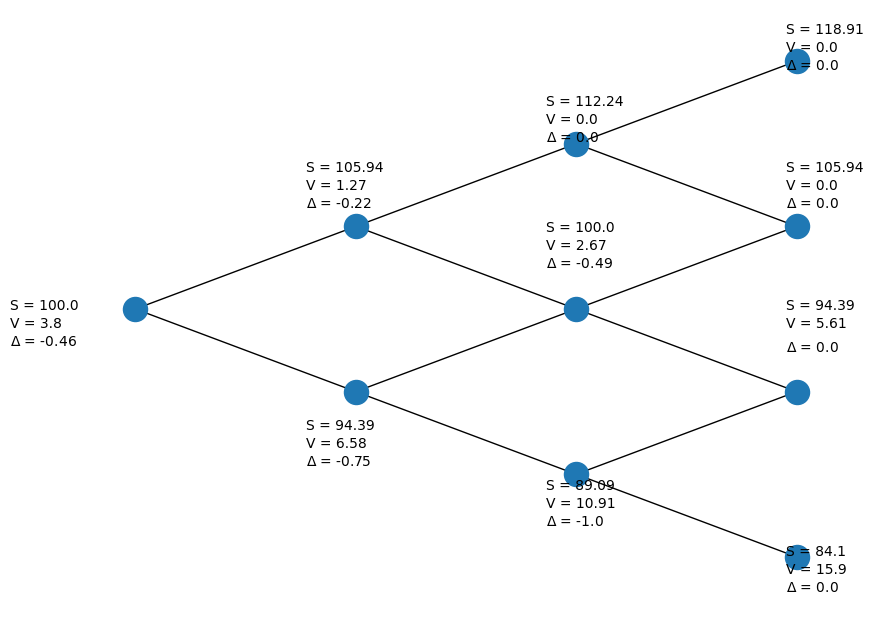

In [58]:
#Plot Binomial Tree
plot_binomial_tree(S[0,0], S, option, delta, N)

In [59]:
# Structure= [ Stock Value at 0, Strike (K), Time Unit (T), Free Interest rate (r), sigma,
#              Number of time units (N), Option Type: Call ('C') or Put ('P'), Exercise Type: "E" or "A" ]
N= 3
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.2, N,'C','A')
# price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.2, N,'P','A')

print("Underlying: \n", S)
print("Option Price: \n", option)  # [0][0]
print("Delta: \n", delta) # [4][0]

Underlying: 
 [[100.           0.           0.           0.        ]
 [ 94.39000224 105.9434237    0.           0.        ]
 [ 89.09472523 100.         112.24009024   0.        ]
 [ 84.09651314  94.39000224 105.9434237  118.91099436]]
Option Price: 
 [[ 4.94433406  0.          0.          0.        ]
 [ 1.60426324  8.04599564  0.          0.        ]
 [ 0.          3.08784976 12.65589006  0.        ]
 [ 0.          0.          5.9434237  18.91099436]]
Delta: 
 [[0.55756058 0.         0.         0.        ]
 [0.28315194 0.78169688 0.         0.        ]
 [0.         0.51442975 1.         0.        ]
 [0.         0.         0.         0.        ]]


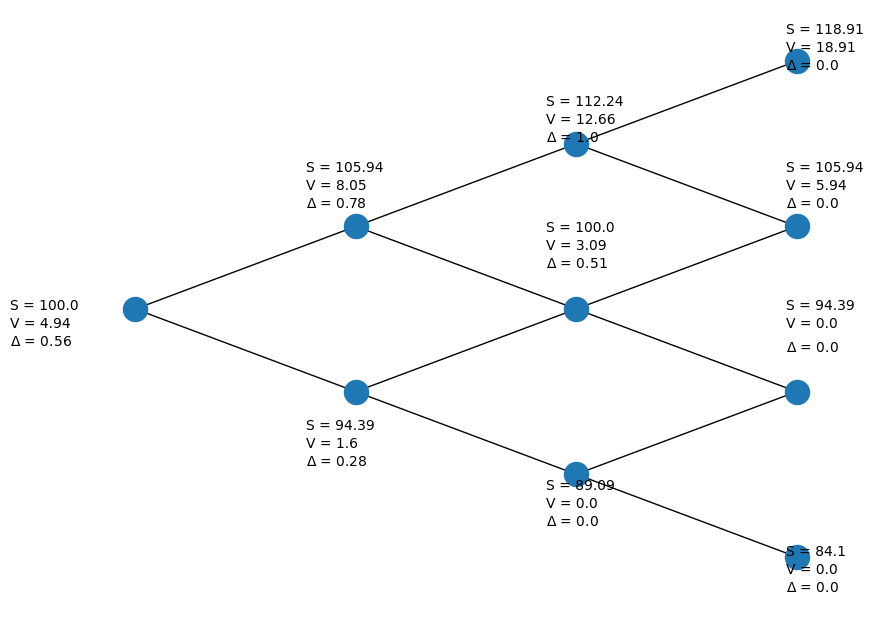

In [60]:
##### Plot Binomial Tree
plot_binomial_tree(S[0,0], S, option, delta, N)

The process of calculating the price of the call and the put at t0 consists in the following steps:

- Compute the upward and downward coefficients u and d calibrated to the provided volatility σ.
- Calculate the possible prices of the stock (S) for all the nodes of the three using the previous coefficients.
- Compute the risk neutral probability p of upward occurrence (1 - p being the probability of downward occurance).
- Determine the payoff of the options at expiry T.
- Determine the value of the options for each node at T - dt as the expected value of the payoff at expiry, duly discounted using the risk free rate (no arbitrage). Then repeat the valuation backwards for each node of the step dt as the expected value, duly discounted, of the option at dt+1.
- However, since we are talking about an American option, if at any step and node, the expected value is lower than the value obtained exercising the option and buying or selling the underlying asset at the node price, then the value of the option should be adjusted to the latter.
- With the backward reiterative calculations, we get the value of the options at t0.

The codes provided in our Jupyter Notebook basically reproduce this methodology. If we run the codes with the data described before, we obtain the following prices at t0:
- Put = 3.80
- Call = 4.94

Do those values comply with the put-call parity? As we said in question 4 of the previous section, the parity only applies to European options, so we do not expect it will apply in this case. Anyway, if we run the code “paritychecker” of our Jupyter Notebook, we obtain these values:

In [61]:
paritychecker(100, 100, 1/4, 0.05, 0.2, N,0,0,'A')

t1 =  103.7
t2 =  103.79
Parity :  False


# Compute the Greek Delta for the American call and Put at time 0:.

From the graph of the trees, we can see that at t0 the values of Delta for the Call and the Put are:

- Call = 0.56
- Put = -0.46

Both values are close to 0.5, which is what you expect for deltas of options ATM. However, we see that the Delta of the Call is slightly higher than the Delta of the Put.

The other interesting thing is that while the delta for the call either for American or European options is practically the same, the absolute value of the delta for the American put is higher than the absolute value of the delta for the European option (see previous European option computations). This is because the American options can be executed at any time and in certain moments exercising the American put is more convenient than holding the option until maturity. Therefore, the delta of the American option should be higher than the delta of its European equivalent.

The positive sign of call deltas and the negative sign of put deltas are logical, since the value of the call increases as the price goes up while the value of the put does the contrary. Delta is the proxy of the hedge ratio, which means that by using delta you can calculate the amount of shares needed to buy or to sell short, to offset the impact of the price movement on the price of the options. Delta also represents the probability of an option finishing in-the-money at maturity, under a no arbitrage assumption.



#Sentitive of American-style options to change of volatility from 20% to 25%.

In [62]:
# Structure= [ Stock Value at 0, Strike (K), Time Unit (T), Free Interest rate (r), sigma,
#              Number of time units (N), Option Type: Call ('C') or Put ('P'), Exercise Type: "E" or "A" ]
N= 3
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.25, N,'C','A')
# price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.25, N,'P','A')

print("Underlying: \n", S)
print("Option Price: \n", option)  # [0][0]
print("Delta: \n", delta) # [4][0]

Underlying: 
 [[100.           0.           0.           0.        ]
 [ 93.03738507 107.48367436   0.           0.        ]
 [ 86.5595502  100.         115.52740254   0.        ]
 [ 80.53274203  93.03738507 107.48367436 124.17309715]]
Option Price: 
 [[ 6.01337612  0.          0.          0.        ]
 [ 1.93692866  9.96552563  0.          0.        ]
 [ 0.          3.80727506 15.94320236  0.        ]
 [ 0.          0.          7.48367436 24.17309715]]
Delta: 
 [[0.55575496 0.         0.         0.        ]
 [0.28326991 0.78158129 0.         0.        ]
 [0.         0.51803437 1.         0.        ]
 [0.         0.         0.         0.        ]]


In [63]:
# Structure= [ Stock Value at 0, Strike (K), Time Unit (T), Free Interest rate (r), sigma,
#              Number of time units (N), Option Type: Call ('C') or Put ('P'), Exercise Type: "E" or "A" ]
N= 3
# price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.25, N,'C','A')
price, option, S, delta = option_sigma(100, 100, 1/4, 0.05, 0.25, N,'P','A')

print("Underlying: \n", S)
print("Option Price: \n", option)  # [0][0]
print("Delta: \n", delta) # [4][0]

Underlying: 
 [[100.           0.           0.           0.        ]
 [ 93.03738507 107.48367436   0.           0.        ]
 [ 86.5595502  100.         115.52740254   0.        ]
 [ 80.53274203  93.03738507 107.48367436 124.17309715]]
Option Price: 
 [[ 4.86981066  0.          0.          0.        ]
 [ 8.27220808  1.65198053  0.          0.        ]
 [13.4404498   3.39147524  0.          0.        ]
 [19.46725797  6.96261493  0.          0.        ]]
Delta: 
 [[-0.45826492  0.          0.          0.        ]
 [-0.74766654 -0.21841871  0.          0.        ]
 [-1.         -0.48196563  0.          0.        ]
 [ 0.          0.          0.          0.        ]]


One of the important “greeks” of the options is Vega, which measures the sensitivity of the option price to the volatility. We are going to perform a change of volatility from 20% to 25% to recalculate the price of the options, leaving unchanged the other parameters.
The following table summarizes the change in prices: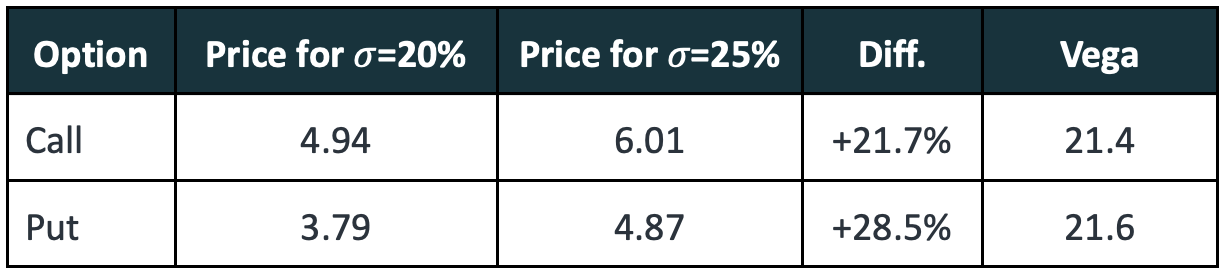.

We can observe that an increase in volatility produces an increase of the price of puts and calls, as expected. More volatility means that the prices of the underlying stock can register wider variations and therefore the price of the options should increase. However, we see that the difference in percentage of the price of the put is higher than the call. This is again because under certain circumstances it is preferable to exercise the put before maturity to get a better economic outcome, while the call should never be executed before maturity in a binomial tree. Since an increase of volatility magnifies the spread of the values of the stock in the tree, the occurrence and/or economic outcome of early exercising the put increases, which is reflected in the price increment. This is why in American options the vega of the put is higher of the call. This is again a confirmation that put-call parity does not apply to American options.

## **Team Member C will produce graphs and confirmations:**

#Question 11:
**If the team answered Q1 as “Yes” (i.e. that put-call parity holds), then show that the European call and put satisfy put-call parity. Comment on the reasons why/why not the parity holds, as well as potential motives.**


Put call parity for European option states that the  price of european call option minus the price of european put option,both with the same strike price and expiration date equals the difference between the underlying asset and the present value of the strike price.

                                C-P=S-PV(K)
Where,
- C= European call option
- P =European put option
- S =Current price of underlying asset
- PV(K) =is the present value of strike price

Put call parity works because both call and put depend on the same thing that is the underlying asset. If price doesn’t match as put -call parity predicts,it means if one option is cheaper than it should be then there will  be an opportunity of arbitrage that would lead to corrective options by market participants.

In question 5 we performed the following calculation for an European options with S0=100, r = 5%, sigma = 20%, T = 3 months, K=100, N=3:


In [64]:
N=3
paritychecker(100, 100, 1/4, 0.05, 0.2, N,0,0,'E')

t1 =  103.7
t2 =  103.7
Parity :  True


Which demonstrates the parity holds.

Reason why  put-call parity holds and potential motives:

Arbitrage opportunities- This opportunity occurs when traders spot differences between put and call options, according to put-call parity . They take advantage of these differences by purchasing cheaper options and selling the more expensive ones. This allows them  to make profit without any risk  and restore the market balance.

Market Efficiency- Put-call parity helps market efficiency by ensuring that options price accurately shows the underlying asset’s price and risk free interest rate. Traders keep an eye on option prices and take part in arbitrage activities.

Option Properties- Both call and put options derive their values from the underlying assets and are subject to the same risk factors and their relationship ensures that the put call parity remains valid.
           
Risk Management- Traders and investors may use put -call parity to manage      their risk in the market. By understanding the relationship between put and call   options, markets can make strategies to protect themselves from unfavorable changes in the price of underlying assets.


#Question 12:
**If the team answered Q4 as “Yes” (i.e. that put-call parity holds), then show that the American call and put satisfy put-call parity. Comment on the reasons why/why not the parity holds, as well as potential motives.**


My team member gave the answer NO, because the right to early exercise can affect the prices of American options. For Put options, in particular, the holder may find financial benefit to exercise the option early. Early exercising the put option may disrupt the put call parity, and therefore American put option price is usually higher than its European equivalent, to compensate for this early possibility.

In question 8 we performed the following calculation for an American options with S0=100, r = 5%, sigma = 20%, T = 3 months, K=100, N=3:



In [65]:
N=3
paritychecker(100, 100, 1/4, 0.05, 0.2, N,0,0,'A')

t1 =  103.7
t2 =  103.79
Parity :  False


#Question 13:

**Confirm that the European call is less than or equal to the American call. Show the difference if any and comment on the reasons for this difference, would this always be the case?**


The European and American calls have the same payoff at maturity, being then identical at this point. Before maturity, the American Call can be exercised by the holder if economically makes sense, and therefore the American call price theoretically may be higher than the European. However, in models like binomial and trinomial, this possibility does not arise if the intrinsic drift in those models is positive enough, and therefore the price of both calls is identical. In practice, people commonly don’t exercise American calls either for several reasons (mainly the possibility of getting a better stock price at maturity). However, this price equality may not always hold true in practice due to various factors like market volatility, interest rates, dividends, and market conditions that can influence the relative pricing of European and American call options. In some cases, like when substantial dividends are expected before the option’s end date, the American call option could cost a lot more than the European.



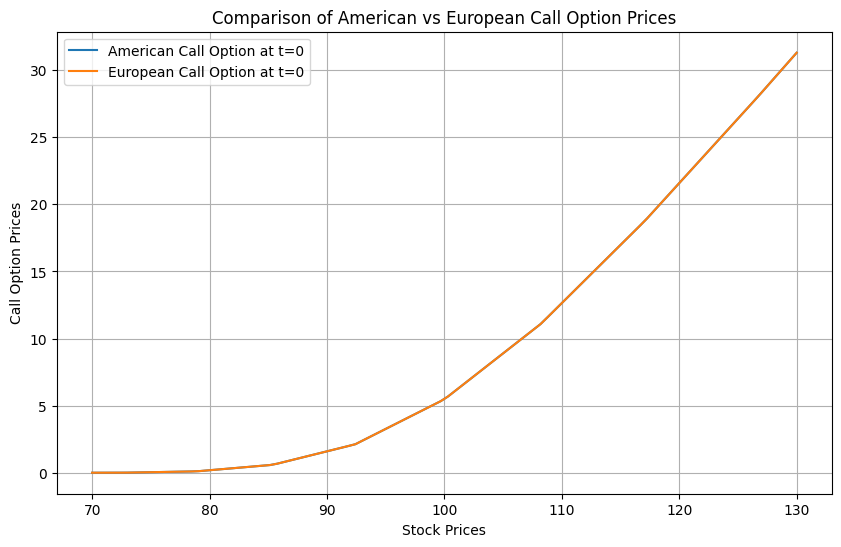

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# The option price is computed using Binomial Tree Model

# Define stock prices
stock_prices = np.linspace(70, 130, 100)
american_call_prices_t0 = []
european_call_prices_t0 = []

# Calculate prices for both American and European call options
for S0 in stock_prices:
    price_A, call_A, S_A, delta_A = option_sigma(S0, 100, 1/4, 0.05, 0.25, 10, 'C', 'A')
    price_E, call_E, S_E, delta_E = option_sigma(S0, 100, 1/4, 0.05, 0.25, 10, 'C', 'E')
    american_call_prices_t0.append(call_A[0][0])
    european_call_prices_t0.append(call_E[0][0])

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, american_call_prices_t0, label='American Call Option at t=0')
plt.plot(stock_prices, european_call_prices_t0, label='European Call Option at t=0')
plt.title('Comparison of American vs European Call Option Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Call Option Prices')
plt.legend()
plt.grid(True)
plt.show()


 Above graph shows that european and american calls have identical values. As a matter of fact, the blue line of the American option is not distinguishable, because the yellow line is superposed.


#Question 14:
**Confirm that the European put is less than or equal to the American put. Show the difference if any and comment on the reasons for this difference. For example, would this always be the case?**


European put is less than or equal to the American put, the main difference arises due to the extra flexibility by the American option, which can be exercised at any time prior to expiration. This can be beneficial only when the market price of the underlying asset falls significantly below the strike price, and then the option holder chooses to exercise it. In European options,  which can be exercised only at maturity, their value depends only on the price of the asset at expiration. The holder must wait with the hope of more favorable market conditions.


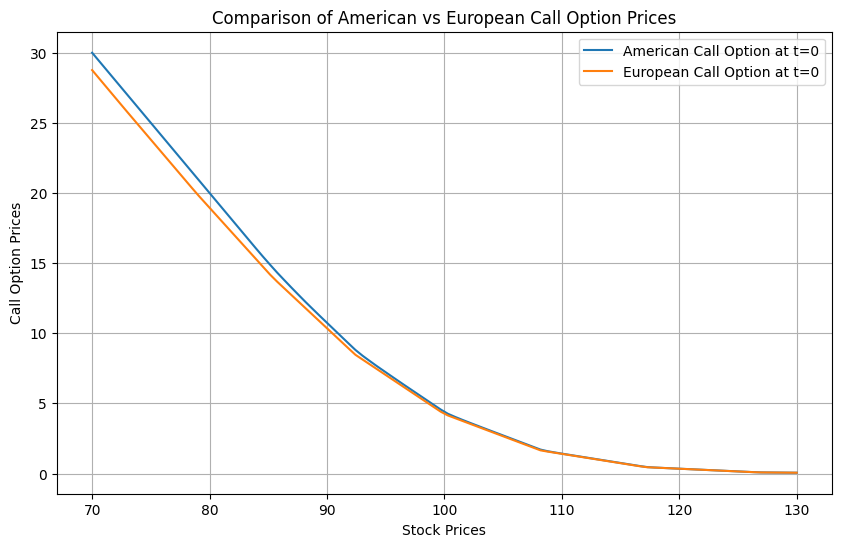

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# The option price is computed using Binomial Tree Model

# Define stock prices
stock_prices = np.linspace(70, 130, 100)
american_call_prices_t0 = []
european_call_prices_t0 = []

# Calculate prices for both American and European call options
for S0 in stock_prices:
    price_A, call_A, S_A, delta_A = option_sigma(S0, 100, 1/4, 0.05, 0.25, 10, 'P', 'A')
    price_E, call_E, S_E, delta_E = option_sigma(S0, 100, 1/4, 0.05, 0.25, 10, 'P', 'E')
    american_call_prices_t0.append(call_A[0][0])
    european_call_prices_t0.append(call_E[0][0])

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, american_call_prices_t0, label='American Call Option at t=0')
plt.plot(stock_prices, european_call_prices_t0, label='European Call Option at t=0')
plt.title('Comparison of American vs European Call Option Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Call Option Prices')
plt.legend()
plt.grid(True)
plt.show()



From the above graph we can see that the American and the European puts tend to be identical when they are OTM, because there is no incentive at all to exercise the option before maturity. However when the put is ITM, the American put is systematically more expensive than the American.

#<font color=red>STEP 2 : Trinomial Model

## **Team Member B will now work pricing European options using tronomial tree:**

# Question 15:
**Select 5 strike prices so that Call options are: Deep OTM, OTM, ATM, ITM, and Deep ITM. (E.g., you can do this by selecting moneyness of 90%, 95%, ATM, 105%, 110%; where moneyness is measured as K/S0):**


Running the code for the Trinomial tree and using the previous data for the option conditions, we obtain the following table:


In [68]:
So = 100
r = 0.05
sigma = 0.2
T = 1/4
N = 3
style = 'E'

df = moneyness_table(So, r, sigma, T, N, style)

# Convert 'Strike Price' to integer and round 'Call' and 'Put' to two decimals
df['Strike Price'] = df['Strike Price'].astype(int)
df['Call'] = df['Call'].round(2)
df['Put'] = df['Put'].round(2)

# Print the DataFrame using tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+----------------+--------+-------+
|    |   Strike Price |   Call |   Put |
+====+================+========+=======+
|  0 |             90 |  11.68 |  0.56 |
+----+----------------+--------+-------+
|  1 |             95 |   7.83 |  1.65 |
+----+----------------+--------+-------+
|  2 |            100 |   4.45 |  3.21 |
+----+----------------+--------+-------+
|  3 |            105 |   2.61 |  6.31 |
+----+----------------+--------+-------+
|  4 |            110 |   1.14 |  9.77 |
+----+----------------+--------+-------+


We can observe that the price of the Call decreases as the strike price K increases. This is logical since the price of the call is related to the payoff = max(S-K, 0). As K increases, ceteris paribus, the payoff decreases.

Parity check is performed in question 23.

# Question 16:

**Repeat Q15 for 5 different strikes for Put options. (Make sure you also answer sections a and b of Q15).**

In the same table above, we can observe that the price of the Put increases as the strike price K increases. This is logical since the price of the call is related to the payoff = max(K-S, 0). As K increases, ceteris paribus, the payoff decreases.


## **Team Member A will now work pricing American options using tronomial tree:**

# Question 17
**A repeat of Q15, but this time considering Call options of American style.**

In [69]:
So = 100
r = 0.05
sigma = 0.2
T = 1/4
N = 3
style = 'A'

df = moneyness_table(So, r, sigma, T, N, style)

# Convert 'Strike Price' to integer and round 'Call' and 'Put' to two decimals
df['Strike Price'] = df['Strike Price'].astype(int)
df['Call'] = df['Call'].round(2)
df['Put'] = df['Put'].round(2)

# Print the DataFrame using tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+----------------+--------+-------+
|    |   Strike Price |   Call |   Put |
+====+================+========+=======+
|  0 |             90 |  11.68 |  0.56 |
+----+----------------+--------+-------+
|  1 |             95 |   7.83 |  1.67 |
+----+----------------+--------+-------+
|  2 |            100 |   4.45 |  3.33 |
+----+----------------+--------+-------+
|  3 |            105 |   2.61 |  6.5  |
+----+----------------+--------+-------+
|  4 |            110 |   1.14 | 10.2  |
+----+----------------+--------+-------+


# Question 18
**A repeat of Q16, but this time considering Put options of American style.**

In [70]:
So = 100
r = 0.05
sigma = 0.2
T = 1/4
N = 3
style = 'A'

df = moneyness_table(So, r, sigma, T, N, style)

# Convert 'Strike Price' to integer and round 'Call' and 'Put' to two decimals
df['Strike Price'] = df['Strike Price'].astype(int)
df['Call'] = df['Call'].round(2)
df['Put'] = df['Put'].round(2)

# Print the DataFrame using tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+----------------+--------+-------+
|    |   Strike Price |   Call |   Put |
+====+================+========+=======+
|  0 |             90 |  11.68 |  0.56 |
+----+----------------+--------+-------+
|  1 |             95 |   7.83 |  1.67 |
+----+----------------+--------+-------+
|  2 |            100 |   4.45 |  3.33 |
+----+----------------+--------+-------+
|  3 |            105 |   2.61 |  6.5  |
+----+----------------+--------+-------+
|  4 |            110 |   1.14 | 10.2  |
+----+----------------+--------+-------+


##**Team Member C will continue to provide graphs and confirmations:**

# Question 19:
**Graph #1. European Call prices and Put Prices versus Stock prices.**

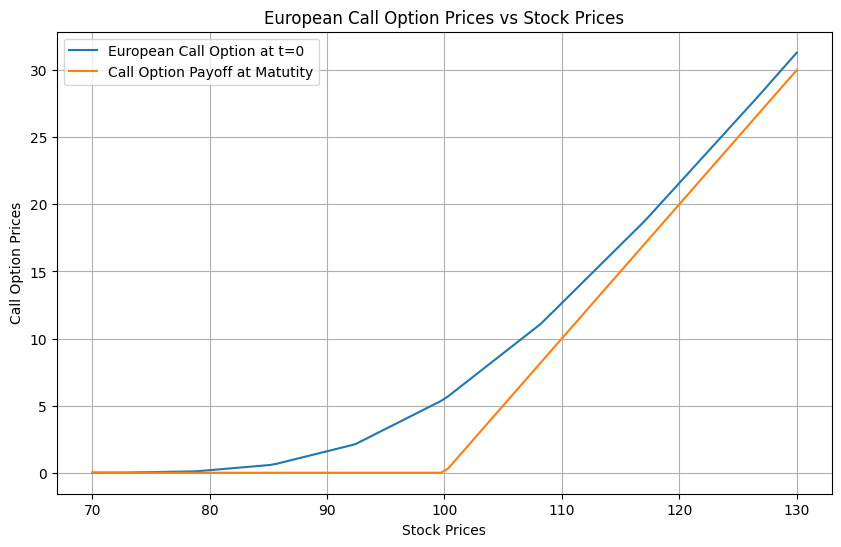

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# The prices of the option are calculated using the Binomial Tree Model

# Define stock prices
stock_prices = np.linspace(70, 130, 100)
call_prices_t0 = []
call_prices_m = []


for S0 in stock_prices:
  price, call, S, delta = option_sigma(S0, 100, 1/4, 0.05, 0.25, 10,'C','E')
  call_prices_t0.append(call[0][0])
  call_prices_m.append(np.maximum(S0 - 100, 0))  # Call option payoff


# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_prices_t0, label='European Call Option at t=0')
plt.plot(stock_prices, call_prices_m, label='Call Option Payoff at Matutity')
plt.title('European Call Option Prices vs Stock Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Call Option Prices')
plt.legend()
plt.grid(True)
plt.show()


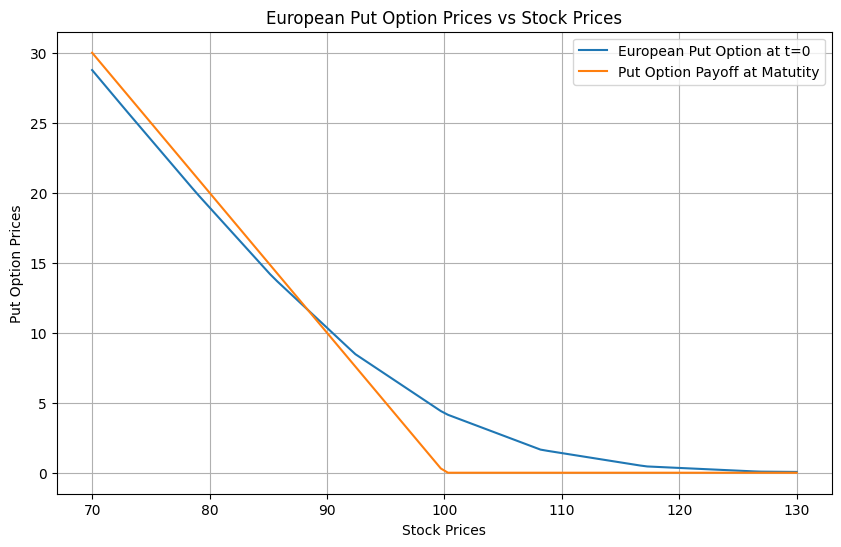

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# The prices of the option are calculated using the Binomial Tree Model

# Define stock prices
stock_prices = np.linspace(70, 130, 100)
call_prices_t0 = []
call_prices_m = []

for S0 in stock_prices:
  price, call, S, delta = option_sigma(S0, 100, 1/4, 0.05, 0.25, 10,'P','E')
  call_prices_t0.append(call[0][0])
  call_prices_m.append(np.maximum(100 - S0, 0))  # Put option payoff


# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_prices_t0, label='European Put Option at t=0')
plt.plot(stock_prices, call_prices_m, label='Put Option Payoff at Matutity')
plt.title('European Put Option Prices vs Stock Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Put Option Prices')
plt.legend()
plt.grid(True)
plt.show()

# Question 20:
**Graph #2. American call prices and put prices versus stock prices.**

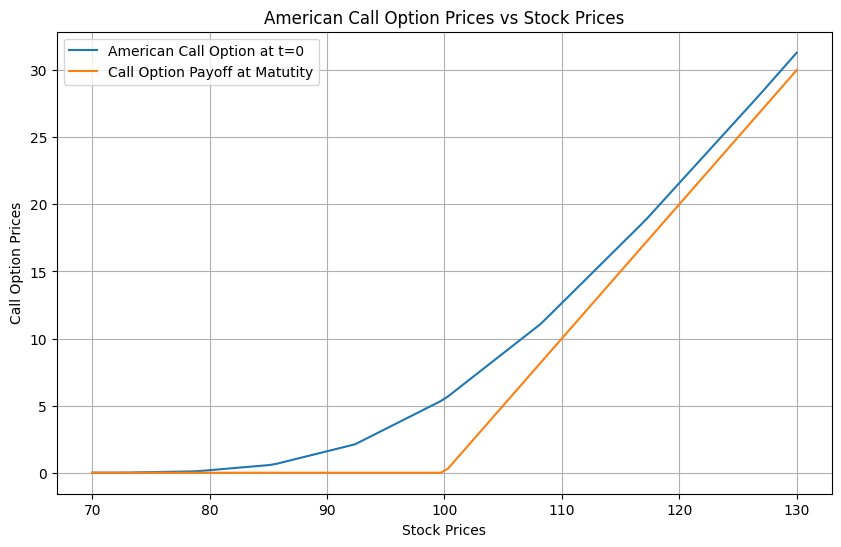

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# The prices of the option are calculated using the Binomial Tree Model

# Define stock prices
stock_prices = np.linspace(70, 130, 100)
call_prices_t0 = []
call_prices_m = []
# Define parameters

for S0 in stock_prices:
  price, call, S, delta = option_sigma(S0, 100, 1/4, 0.05, 0.25, 10,'C','A')
  call_prices_t0.append(call[0][0])
  call_prices_m.append(np.maximum(S0 - 100, 0))  # Call option payoff


# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_prices_t0, label='American Call Option at t=0')
plt.plot(stock_prices, call_prices_m, label='Call Option Payoff at Matutity')
plt.title('American Call Option Prices vs Stock Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Call Option Prices')
plt.legend()
plt.grid(True)
plt.show()

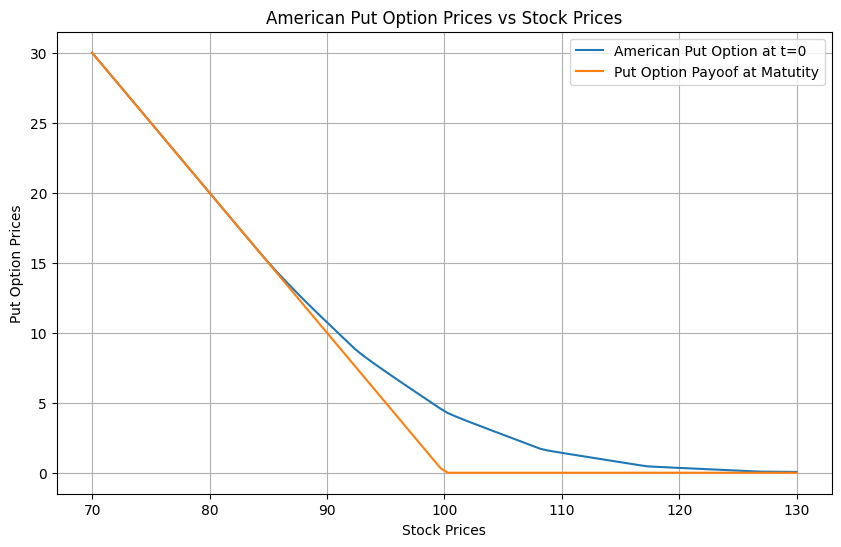

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# The prices of the option are calculated using the Binomial Tree Model

# Define stock prices
stock_prices = np.linspace(70, 130, 100)
call_prices_t0 = []
call_prices_m = []
# Define parameters

for S0 in stock_prices:
  price, call, S, delta = option_sigma(S0, 100, 1/4, 0.05, 0.25, 10,'P','A')
  call_prices_t0.append(call[0][0])
  call_prices_m.append(np.maximum(100 - S0, 0))  # Put option payoff


# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_prices_t0, label='American Put Option at t=0')
plt.plot(stock_prices, call_prices_m, label='Put Option Payoof at Matutity')
plt.title('American Put Option Prices vs Stock Prices')
plt.xlabel('Stock Prices')
plt.ylabel('Put Option Prices')
plt.legend()
plt.grid(True)
plt.show()

# Question 21:
**Graph #3. European and American call prices versus strike.**


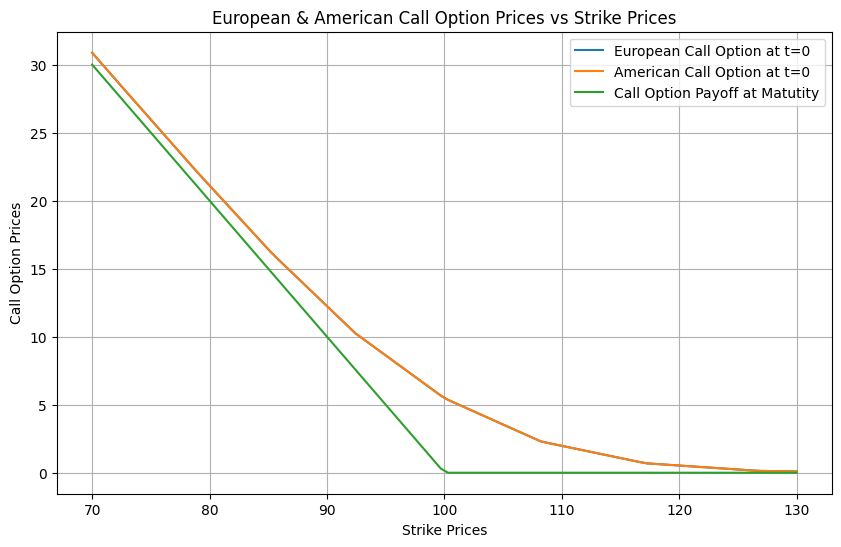

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# The prices of the option are calculated using the Binomial Tree Model

# Define stock prices
S0 = 100
K = np.linspace(70, 130, 100)
eur_call_prices_t0 = []
am_call_prices_t0 = []
call_prices_m = []


for k in K:
  price, call, S, delta = option_sigma(S0, k, 1/4, 0.05, 0.25, 10,'C','E')
  eur_call_prices_t0.append(call[0][0])
  price, call, S, delta = option_sigma(S0, k, 1/4, 0.05, 0.25, 10,'C','A')
  am_call_prices_t0.append(call[0][0])
  call_prices_m.append(np.maximum(S0 - k, 0))  # Call option payoff

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(K, eur_call_prices_t0, label='European Call Option at t=0')
plt.plot(K, am_call_prices_t0, label='American Call Option at t=0')
plt.plot(K, call_prices_m, label='Call Option Payoff at Matutity')
plt.title('European & American Call Option Prices vs Strike Prices')
plt.xlabel('Strike Prices')
plt.ylabel('Call Option Prices')
plt.legend()
plt.grid(True)
plt.show()

# Question 22:
**Graph #4. European and American put prices versus strike.**

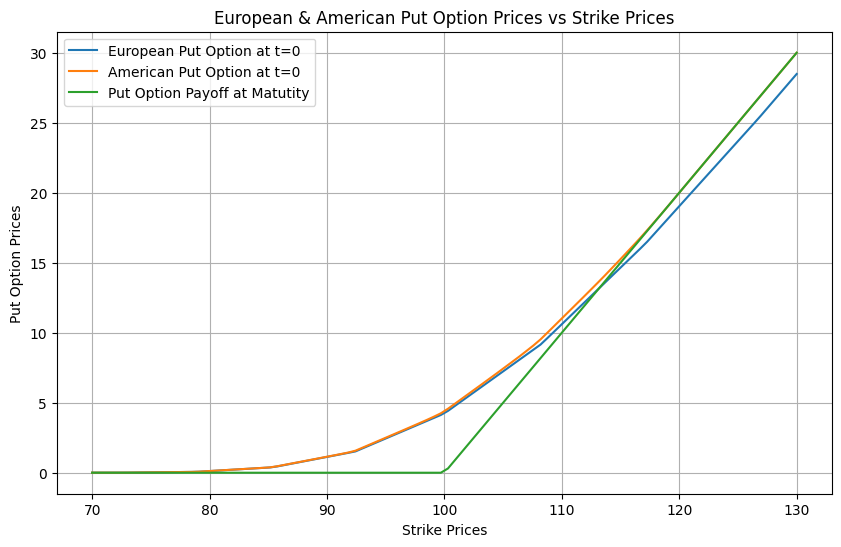

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# The prices of the option are calculated using the Binomial Tree Model

# Define stock prices
S0 = 100
K = np.linspace(70, 130, 100)
eur_call_prices_t0 = []
am_call_prices_t0 = []
call_prices_m = []


for k in K:
  price, call, S, delta = option_sigma(S0, k, 1/4, 0.05, 0.25, 10,'P','E')
  eur_call_prices_t0.append(call[0][0])
  price, call, S, delta = option_sigma(S0, k, 1/4, 0.05, 0.25, 10,'P','A')
  am_call_prices_t0.append(call[0][0])
  call_prices_m.append(np.maximum(k - S0, 0))  # Put option payoff

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(K, eur_call_prices_t0, label='European Put Option at t=0')
plt.plot(K, am_call_prices_t0, label='American Put Option at t=0')
plt.plot(K, call_prices_m, label='Put Option Payoff at Matutity')
plt.title('European & American Put Option Prices vs Strike Prices')
plt.xlabel('Strike Prices')
plt.ylabel('Put Option Prices')
plt.legend()
plt.grid(True)
plt.show()

# Question 23:
**For the 5 strikes that your group member computed in Q15 and Q16, check whether put-call parity holds (within sensible rounding). Briefly comment on the reasons why/why not this is the case.**


In [77]:
def calculate_put_call_parity(strike_prices, call_prices, put_prices, current_stock_price, risk_free_rate, time_to_expiration):
    print("Strike | Theoretical (S-K*e^(-rT)) | Actual (C-P) | Difference")

    # Iterate through the list of strike prices, call prices, and put prices
    for K, C, P in zip(strike_prices, call_prices, put_prices):
        # Calculate the theoretical value using the put-call parity formula
        theoretical = current_stock_price - K * np.exp(-risk_free_rate * time_to_expiration)
        # Calculate the actual difference between the call and put prices
        actual = C - P
        # Calculate the difference between theoretical and actual values
        difference = theoretical - actual
        print(f"{K:<6} | {theoretical:22.2f} | {actual:12.2f} | {difference:12.2f}")

# Parameters
strike_prices = [90, 95, 100, 105, 110]
call_prices = [11.68, 7.83, 4.45, 2.61, 1.14]
put_prices = [0.56, 1.65, 3.21, 6.31, 9.77]
current_stock_price = 100  # Assumed current stock price
risk_free_rate = 0.05  # Annual risk-free rate
time_to_expiration = 1/4  # Time to expiration in years

# Call the function with the defined parameters
calculate_put_call_parity(strike_prices, call_prices, put_prices, current_stock_price, risk_free_rate, time_to_expiration)


Strike | Theoretical (S-K*e^(-rT)) | Actual (C-P) | Difference
90     |                  11.12 |        11.12 |        -0.00
95     |                   6.18 |         6.18 |         0.00
100    |                   1.24 |         1.24 |         0.00
105    |                  -3.70 |        -3.70 |         0.00
110    |                  -8.63 |        -8.63 |        -0.00


Put call parity holds, as expected, because we are dealing with European options.

# Question 24:
**For the 5 strikes that your group member computed in Q17 and Q18, check whether put-call parity holds (within sensible rounding). Briefly comment on the reasons why/why not this is the case.**

In [78]:
def calculate_put_call_parity(strike_prices, call_prices, put_prices, current_stock_price, risk_free_rate, time_to_expiration):
    print("Strike | Theoretical (S-K*e^(-rT)) | Actual (C-P) | Difference")

    # Iterate through the list of strike prices, call prices, and put prices
    for K, C, P in zip(strike_prices, call_prices, put_prices):
        # Calculate the theoretical value using the put-call parity formula
        theoretical = current_stock_price - K * np.exp(-risk_free_rate * time_to_expiration)
        # Calculate the actual difference between the call and put prices
        actual = C - P
        # Calculate the difference between theoretical and actual values
        difference = theoretical - actual
        print(f"{K:<6} | {theoretical:22.2f} | {actual:12.2f} | {difference:12.2f}")

# Parameters
strike_prices = [90, 95, 100, 105, 110]
call_prices = [11.68, 7.83, 4.45, 2.61, 1.14]
put_prices = [0.56, 1.67, 3.33, 6.5, 10.2]
current_stock_price = 100  # Assumed current stock price
risk_free_rate = 0.05  # Annual risk-free rate
time_to_expiration = 1/4  # Time to expiration in years

# Call the function with the defined parameters
calculate_put_call_parity(strike_prices, call_prices, put_prices, current_stock_price, risk_free_rate, time_to_expiration)


Strike | Theoretical (S-K*e^(-rT)) | Actual (C-P) | Difference
90     |                  11.12 |        11.12 |        -0.00
95     |                   6.18 |         6.16 |         0.02
100    |                   1.24 |         1.12 |         0.12
105    |                  -3.70 |        -3.89 |         0.19
110    |                  -8.63 |        -9.06 |         0.43


In both questions 17 and 18, call parity does not hold, because we are dealing with American options.

Is interesting to note that when the option is OTM, the put-call parity is almost reached. This is because the price of both American and European puts tend to be similar, as we saw in question 14, when the price of the stock is deep OTM. Since the price of the American and European calls are the same in any scenario, as we saw in question 13, then American options tend to hold the parity.


#<font color=red>STEP 3

#Question 25:
**Dynamic Delta Hedging using Binomial Tree for an European Option.**

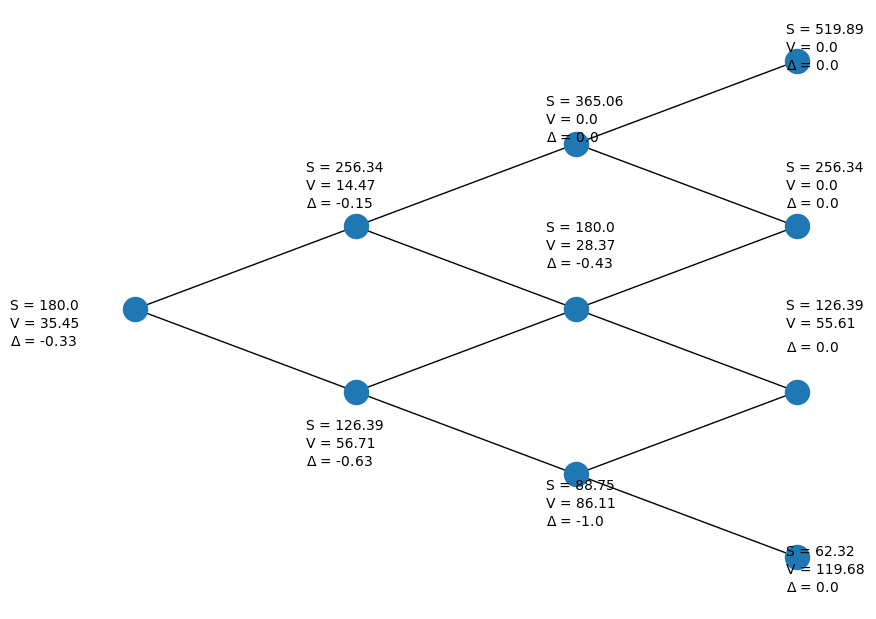

In [79]:
# Structure= [ Stock Value at 0, Strike (K), Time Unit (T), Free Interest rate (r), sigma,
#              Number of time units (N), Option Type: Call ('C') or Put ('P'), Exercise Type: "E" or "A" ]
N= 3

price, option, S, delta = option_sigma(180, 182, 6, 0.02, 0.25, N,'P','E')
##### Plot Binomial Tree
plot_binomial_tree(S[0,0], S, option, delta, N)

Using the data provided for the European Put Option, consisting in: So=180, K=182, r=2%, =0.25, T=6 and N=3, we constructed the above binomial tree.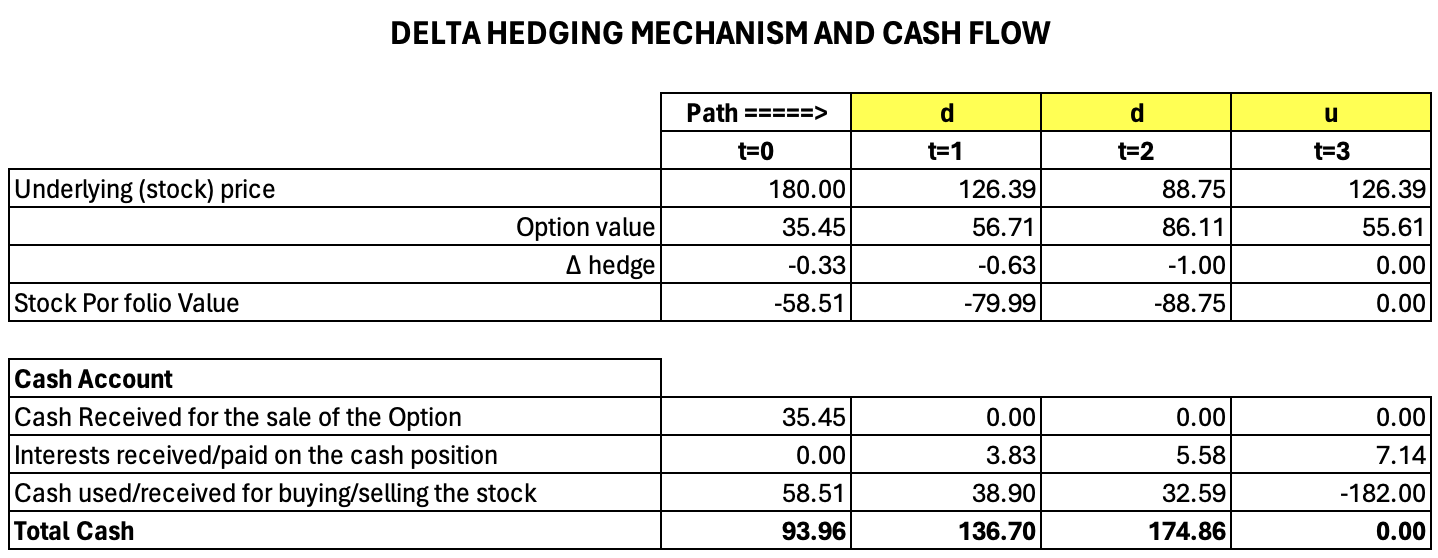

We chose the following path: d d u, to construct the cash flow table above that we are going to use to explain the mechanism of hedging:

At t=0: we sell the Put for a price of 35.45. Since Delta is -0.33, we short a fraction of 0.33 shares of the stock at the price 180 and we get a cash of 58.51 for a total cash of 93.96, which is placed in a risk free instrument yielding 2%.

At t=1: we get 3.83 of interests of the cash in t0 (93.96). Since the delta now is -0.63, we have to increase the short on the stock by a fraction of 0.30 at a price of 126.39, receiving a total amount of 38.90. Then the new total cash is 136.70 which is again invested in a risk free instrument yielding 2%.

At t=2: we get 5.58 of interest. Since delta now is -1, means that we have to go even shorter to obtain a whole stock as a short position. We then sell a fraction of 0.37 of a share at a price of 88.75, getting a cash of 32.59 for a total cash of 174.86 that is again invested at 2%.

At Maturity: we get 7.14 of interest payment. Since the option is ITM the buyer executes the contract, selling us 1 share of the stock at the strike price of 182. We already had 174.86, plus 7.14 of new interest makes a total of 182 we use to pay the purchase of the stock. We use the stock to cover the short of one stock we had at the end of t=2.

As seen, we were fully hedged since at the end we had no loss at all (even if the put expired ATM!). This outcome is the same for any path of the tree, but requires dynamically adjusting the hedge as per the market conditions. The downside is that with the Delta Hedging we have no gain either, being the commissions our real income for participating as market makers.


# Question 26:
**Using the same data from Q25, price an American Put option. Still, assume you are acting as the seller of this put. Consider now 25 steps in the tree (do this via python code).**

In [80]:
# Codes to calculate the cash flow of an American Put, given a path
def path_to_list(path):
    mapping1 = {'u': 'u', 'd': 'd'}
    mapping2 = {'u': 1, 'd': 0}
    return [mapping1[char] for char in path if char in mapping1], [mapping2[char] for char in path if char in mapping2]

def cash_flow(S, option, delta, path, r, dt, K):
    result0 = [" "] + path_to_list(path)[0]
    result = [0] + path_to_list(path)[1]

    j = 0
    f = 1.0
    s_p = []
    option_p = []
    delta_p = []
    op_exer = [" "]

    cash_r = [option[0][0]] + (len(result)-1)*[0.0]
    stk_trade_cash = [- (S[0][0] * delta[0][0])]
    int_r = [0.0]
    tot_cash = [option[0][0] - (S[0][0] * delta[0][0])]


    # Extracting the path elements from the matrices
    for i in range(len(result)):
            j = j + result[i]
            s_p += [S[i][j]]
            option_p += [option[i][j]]
            delta_p += [delta[i][j]]


            if i > 0:
                int_r += [tot_cash[-1] * (np.exp(r * dt) - 1)]
                if delta[i, j] == -1 and f == 1.0:
                    stk_trade_cash += [- K + (delta_p[-2]-delta_p[-1]) * s_p[-1]]
                    tot_cash += [tot_cash[-1] + int_r[i] + stk_trade_cash[-1]]
                    op_exer += ["<== sold " + str(round(1 + delta_p[-2],2)) + " shares, $"+str(K)+" paid"]
                    f = 0.0
                else:
                    stk_trade_cash += [((delta_p[-2]-delta_p[-1]) * s_p[-1]) * f]
                    tot_cash += [tot_cash[-1] + int_r[i] + stk_trade_cash[-1]]
                    op_exer += [" "]



    # Creating a DataFrame
    data = {
        "Path": result0,
        "Stock Price": s_p,
        "Option Value": option_p,
        "Delta Hedge": delta_p,
        "Cash Option sale": cash_r,
        "Interests eraned": int_r,
        "Stock trade net cash": stk_trade_cash,
        "Tot Cash": tot_cash,
        "Option exercising": op_exer
    }

    df = pd.DataFrame(data)

    return df


In [81]:
K = 182
N= 25
T = 6
dt = T/N
r = 0.02
path = 'uuuudddddduuuuddddddduuud'

dt = T/N
price, option, S, delta = option_sigma(180, K, T, r, 0.25, N,'P','A')

df = cash_flow(S, option, delta, path, r, dt, K)
df['Stock Price'] = df['Stock Price'].round(2)
df['Option Value'] = df['Option Value'].round(2)
df['Delta Hedge'] = df['Delta Hedge'].round(2)
df['Cash Option sale'] = df['Cash Option sale'].round(2)
df['Interests eraned'] = df['Interests eraned'].round(2)
df['Stock trade net cash'] = df['Stock trade net cash'].round(2)
df['Tot Cash'] = df['Tot Cash'].round(2)

df

,Path,Stock Price,Option Value,Delta Hedge,Cash Option sale,Interests eraned,Stock trade net cash,Tot Cash,Option exercising
0,,180.00,35.52,-0.36,35.52,0.00,64.27,99.80,
1,u,203.45,27.63,-0.28,0.00,0.48,-16.35,83.93,
2,u,229.96,20.70,-0.21,0.00,0.40,-16.06,68.27,
3,u,259.92,14.83,-0.15,0.00,0.33,-15.28,53.32,
4,u,293.79,10.07,-0.10,0.00,0.26,-13.96,39.61,
5,d,259.92,13.67,-0.15,0.00,0.19,11.60,51.40,
6,d,229.96,18.26,-0.21,0.00,0.25,13.76,65.41,
7,d,203.45,24.01,-0.28,0.00,0.31,15.80,81.53,
8,d,180.00,31.04,-0.38,0.00,0.39,17.48,99.39,
9,d,159.25,39.39,-0.50,0.00,0.48,18.55,118.42,


In the table above, we can see the process of the Delta Hedging for an American put, for S0 = 180, r = 2%, sigma = 0.25, T=6 months, K=182, including the evolution of the cash account.

The path chosen is shown in the first column.

The process is the following: At t=0: we sell the Put for a price of 35.52. Since Delta is -0.36, we short a fraction of 0.36 shares of the stock at the current price of 180 and we get a cash of 64.27 for a total cash of 99.80, which is placed in a risk free instrument yielding 2%.

At t=1: we get 0.48 of interest of the cash in t0 (99.80). Since the delta now is -0.28, we have to decrease the short on the stock by a fraction of 0.08 at a price of 203.45, requiring to pay a total amount of 16.35. Then the new total cash is 83.93 which is again invested in a risk free instrument yielding 2%.

This dynamic continues, going shorter or buying securities as per the delta hedge calculation. However, in step 20 the customer exercises the put, because it is more convenient for him than waiting until maturity. Since delta now is -1, it means that we have to go even shorter to obtain a whole stock as a short position. We then sell a fraction of 0.07662 (rounded to 0.08 for the presentation) of a share at a price of 110.28, getting a cash of 8.45, that added to the 172.72 we already had in cash plus the interests of 0.83, we obtain the 182 needed to pay the customer the purchase of 1 stock at the strike price.

As seen, in the case of an American put we were again fully hedged with no loss at all, even if the put was early exercised by the customer.
The difference between hedging an European Option and an American Option is that in general the delta hedging of an American option costs more because the deltas are in general higher (in absolute terms), as they should contemplate the early exercise of the option. This is why the cost of the put at t0 is higher for the American option.

# Question 27:  
**Finally, repeat Q26 considering now an Asian ATM Put option. Comment on your results as compared to the regular American Put option case of Q25.**

In [82]:
# Function to compute the value os an Asian Put using MC Method

def put_option_mc(S_ini, S_m_ini, step, K, dt, r, sigma, N, u, d, p, M):
    # Here step is the actual step number where we are computing the value of the option
    # Here N is the number of steps remaining to maturity.
    # N + step = always the total number of steps, which in our case is 25 or len of the path.
    T = N * dt
    Asian = np.zeros([M]) # put prices

    Medio = np.zeros([M])

    S = np.zeros([M, N + 1]) # underlying price
    S[:, 0] = S_ini


    for j in range(0, M):
        random = np.random.binomial(1, p, N + 1)
        Total = 0.0
        for i in range(1, N + 1):
            if random[i] == 1:
                S[j, i] = S[j, i - 1] * u
                Total = Total + S[j, i]
            else:
                S[j, i] = S[j, i - 1] * d
                Total = Total + S[j, i]

        Total = Total/N
        if step == 0: Total = Total * 26/25
        # The mean of the price has to be wheighted with the mean that already had the path.
        Asian[j] = np.exp(-r * T) * max(K - ((S_m_ini * (step/(N+step+1)) + Total * ((25-step)/(N+step+1)))), 0)

    return Asian


In [83]:
# Codes to calculate the cash flow of an American Put, given a path
def path_to_list(path):
    mapping1 = {'u': 'u', 'd': 'd'}
    mapping2 = {'u': 1, 'd': 0}
    return [mapping1[char] for char in path if char in mapping1], [mapping2[char] for char in path if char in mapping2]

def cash_flow_asian(S, S_mean, option, delta, path, r, dt, K):
    result0 = [" "] + path_to_list(path)[0]
    result = [0] + path_to_list(path)[1]

    j = 0
    f = 1.0
    s_p = []
    option_p = []
    delta_p = []

    cash_r = [option[0]] + (len(result)-1)*[0.0]
    stk_trade_cash = [- (S[0] * delta[0])]
    int_r = [0.0]
    tot_cash = [option[0] - (S[0] * delta[0])]


    # Extracting the path elements from the matrices
    for i in range(len(result)):
            j = j + result[i]
            s_p += [S[i]]
            option_p += [option[i]]
            delta_p += [delta[i]]

            if i > 0:
                int_r += [tot_cash[-1] * (np.exp(r * dt) - 1)]
                stk_trade_cash += [((delta_p[-2]-delta_p[-1]) * s_p[-1])]
                tot_cash += [tot_cash[-1] + int_r[-1] + stk_trade_cash[-1]]


    # Creating a DataFrame
    data = {
        "Path": result0,
        "Stock Price": s_p,
        "Mean Stock Price": S_mean,
        "Option Value": option_p,
        "Delta Hedge": delta_p,
        "Cash Option sale": cash_r,
        "Interests eraned": int_r,
        "Stock trade net cash": stk_trade_cash,
        "Tot Cash": tot_cash
    }

    df = pd.DataFrame(data)

    return df


In [84]:
# This Code if for Asian Put

path = 'uuuudddddduuuuddddddduuud'

K = 180
sigma = 0.25
r =  0.02
dt=6/25 #Definetimestep

# Calculate parameters
u = np.exp(sigma * np.sqrt(dt)) # Define u
d = np.exp(-sigma * np.sqrt(dt)) # Define d
p=(np.exp(r*dt)-d)/(u-d) #riskneutralprobs

# Initial values
S = [180]
S_mean = [180]
P = put_option_mc(S[-1], S_mean[-1], 0, K, dt, r, sigma, 25, u, d, p, 100000)
Put_price =  [np.mean(P)]

# Calculating Delta at t=0
# First:get the possible prices of the stock  (up and down)
S_u = (S[-1] * u)
S_d = (S[-1] * d)

# Second: get the average stock price at step 1 for both up and down.
S_m_u = (S_u+180)/2
S_m_d = (S_d+180)/2
S_dif = S_m_u - S_m_d

# Calculating the value of the options at the nex step 1 (up and down), in order to
# compute Delta at step = 0.
P = put_option_mc(S_u, S_m_u, 1, K, dt, r, sigma, 24, u, d, p, 96000)
P_u = np.mean(P)
P = put_option_mc(S_d, S_m_d, 1, K, dt, r, sigma, 24, u, d, p, 96000)
P_d = np.mean(P)
P_dif = P_u - P_d

# Computing delta at step 0.
delta = [P_dif/S_dif]

path_list = path_to_list(path)[1]

for i in range(1,len(path_list)+1):
    S += [max(path_list[i-1]*u, d) * S[-1]]
    S_mean += [((S_mean[-1]*i)+S[-1])/(i+1)]

    if i < len(path_list): #S_ini, K, dt, r, sigma, N, u, d, p, M
        P = put_option_mc(S[-1], S_mean[-1], i, K, dt, r, sigma, 25-i, u, d, p, (25-i)*4000)
        Put_price +=  [np.mean(P)]

        # Calculate the up and down prices of the next step, and their difference
        S_m_u = ((S[-1] * u) + (S_mean[-1] * (i+1)))/(i+2)
        S_m_d = ((S[-1] * d) + (S_mean[-1] * (i+1)))/(i+2)
        S_dif = S_m_u - S_m_d


        # Calculate the Put value for up and down of the next step and their difference

        # if the next step is maturity, then the value of the put is the present value of payoff
        if i == len(path_list)-1:
            P_u = np.exp(-r * dt) * max(K - S_m_u, 0)
            P_d = np.exp(-r * dt) * max(K - S_m_d, 0)
        # Otherwise:
        else:
            P = put_option_mc(S[-1] * u, S_m_u, i+1, K, dt, r, sigma, 25-i-1, u, d, p, (25-i)*4000)
            P_u = np.mean(P)
            P = put_option_mc(S[-1] * d, S_m_d, i+1, K, dt, r, sigma, 25-i-1, u, d, p, (25-i)*4000)
            P_d = np.mean(P)

        P_dif = P_u - P_d

        # Calculate the value of Delta
        delta += [P_dif/S_dif]

    # if we reach maturity, then the value of the put is the payoff
    else:
        Put_price +=  [max(K - S_mean[-1], 0)]
        delta += [0.0]



In [85]:
df = cash_flow_asian(S, S_mean, Put_price, delta, path, r, dt, K)
df['Stock Price'] = df['Stock Price'].round(2)
df['Mean Stock Price'] = df['Mean Stock Price'].round(2)
df['Option Value'] = df['Option Value'].round(2)
df['Delta Hedge'] = df['Delta Hedge'].round(2)
df['Cash Option sale'] = df['Cash Option sale'].round(2)
df['Interests eraned'] = df['Interests eraned'].round(2)
df['Stock trade net cash'] = df['Stock trade net cash'].round(2)
df['Tot Cash'] = df['Tot Cash'].round(2)

df

,Path,Stock Price,Mean Stock Price,Option Value,Delta Hedge,Cash Option sale,Interests eraned,Stock trade net cash,Tot Cash
0,,180.00,180.00,19.15,-0.75,19.15,0.00,134.86,154.01
1,u,203.45,191.73,13.43,-0.75,0.00,0.74,0.77,155.53
2,u,229.96,204.47,7.14,-0.58,0.00,0.75,-39.77,116.50
3,u,259.92,218.33,3.10,-0.34,0.00,0.56,-62.95,54.12
4,u,293.79,233.42,0.92,-0.12,0.00,0.26,-62.62,-8.24
5,d,259.92,237.84,1.70,-0.28,0.00,-0.04,41.63,33.35
6,d,229.96,236.71,2.98,-0.60,0.00,0.16,71.76,105.28
7,d,203.45,232.56,5.09,-1.12,0.00,0.51,106.88,212.66
8,d,180.00,226.72,8.05,-1.97,0.00,1.02,152.72,366.40
9,d,159.25,219.97,12.23,-3.08,0.00,1.76,176.28,544.44


In the table above, we can see the process of the Delta Hedging for an Asian put, for S0 = 180, r = 2%, sigma = 0.25, T=6 months, K=180 (ATM), N = 25; including the evolution of the cash account.

For this simulation we used the same path as the one used in the previous question.

To accomplish this task, we used the Monte Carlo Method combined with Binomial Tree model, since the Asian options are dependent on the path, this means that there are many ways to arrive at the same node in the tree, but each path will provide a different result. Therefore, since this is a numerical method, not an exact formulation, the results are much less accurate.

Since we call the Monte Carlo Method code to compute the values many times along the process of calculating put values and Deltas, in order to economize time of CPU, the maximum number of iterations used in a single computation was 100,000. Although this is enough to produce good approximate numbers, we estimate an error of +/- 0.5% in each number calculated. This is why we see that at the end we have a positive cash not exactly zero, as in the previous question, because in a 25 steps simulation of puts and deltas, the error propagates. Even so, the simulation is good enough to show how the hedging is done.

The principles are the same: short stocks according to the value of delta, buy or sell more stocks for the delta change, invest or borrow the cash account at the free rate, etc. In our case there's no early execution of the option, as in the American option case; but in this example the option es exercised at maturity, because the strike price (180) is slightly above the mean price of 178.07.

Asian option are more difficult to hedge because they have a different sensibility to changes of the stock price, since the refference price is the rolling mean price of the stock along the path, not just the current price of the stock.


#References

* 1. Cox, J.C., Ross, S.A. and Rubinstein, M., 1979. Option pricing: A simplified approach. Journal of Financial Economics, 7(3), pp.229-263.
* 2. Hull, J.C. (2018). Options, Futures, and Other Derivatives. 10th ed. Pearson.
* 3. WQU MScFE620 Derivative Pricing, Lectures.
* 4. Pricing and Hedging Asian Options, Vineet B. Lakhlani, Utah State University. ​​https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=1315&context=gradreports
* 5. Wikipedia. https://en.wikipedia.org/wiki/Binomial_options_pricing_model


